<a href="https://colab.research.google.com/github/mantrala1/DataScienceprojects/blob/master/simple_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### CARDIO Project


In [ ]:
import os as os
import pandas as pd


# Import the csv file

In [ ]:
cardio = pd.read_csv("CardioGoodFitness.csv")

###### describe the shape of dataset
# The dataset has 180 rows and 9 columns

In [ ]:
cardio.shape


(180, 9)

In [ ]:
# List the names of columns
list(cardio.columns.values)

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

# Generate list of datatypes for all columns


In [ ]:

cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

# Generate Descriptive statistics for numeric columns

In [ ]:

cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Check for missing values.

In [ ]:

cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Univariate Statistics :
# for all categorical variables show count plots.
# for all numerical variables show distribution plot.

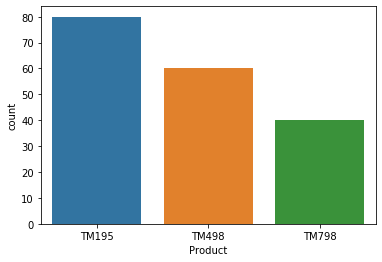

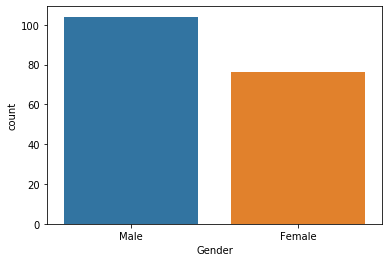

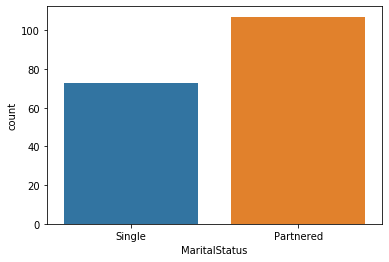

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for column in cardio.columns :
    #plt.subplot(3,3,i)
    if cardio[column].dtype == 'object' :
        sns.countplot(cardio[column])
        plt.show()
        

# The count plots for 3 categorical variables Gender, Marital Status, Product show that  i) TM195 is the most selling product ii)  workouts are more frequent compared in partnered marital status compared to single status iii) Males work out more frequently compared to Females

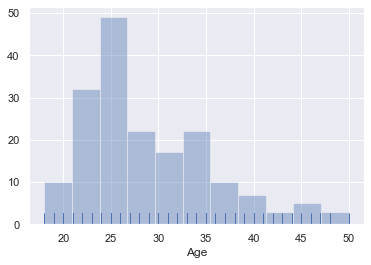

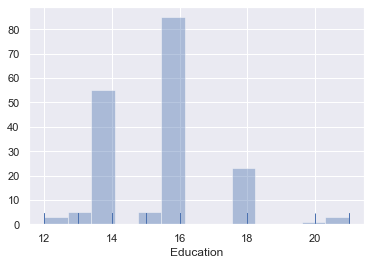

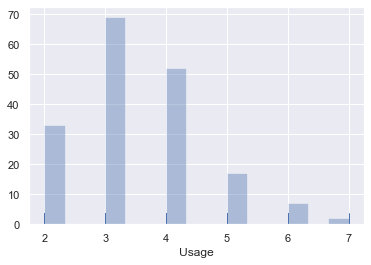

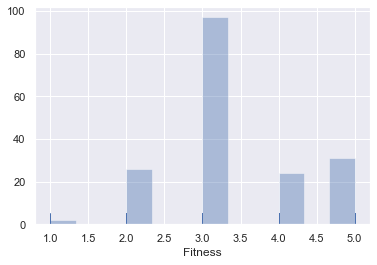

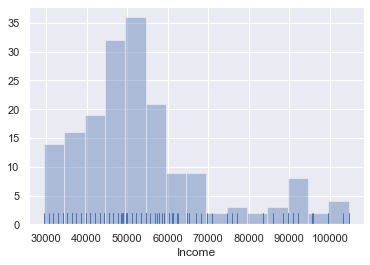

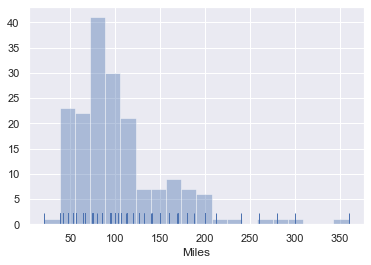

In [ ]:
# for all numeric variables show distribution plots.
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

for column in cardio.columns :
    #plt.subplot(3,3,i)
    if cardio[column].dtype == 'int64' :
        sns.distplot(cardio[column],kde=False,rug=True)
        plt.show()
        


# Observations from numerical data:
# Age data shows positive skewness since Mean age (28) > Median(26)
# The mean income is 53.7k, while the median income is 50.5k, indicating positive skewness
# Miles also exhibit positive skewness since mean (103) > median(94)
# Education data is more evenly distributed compared to that of Age. The mean Education term is 15.5, while the median is 16 yrs of education
# On average, treadmills are used 3-3.5 times per week.
# The average fitness level is 3.3 indicating most people are moderately fit.

# Generating bi-variate analysis.


# the 2 pair wise relations of interest are : Age vs Income,  Age vs Miles.  A positive correlation can be seen between
# Age and Income.  Age vs Miles show that most miles are run when Age is <=40, with highest concentration of miles shown beteen Ages 25 and 30

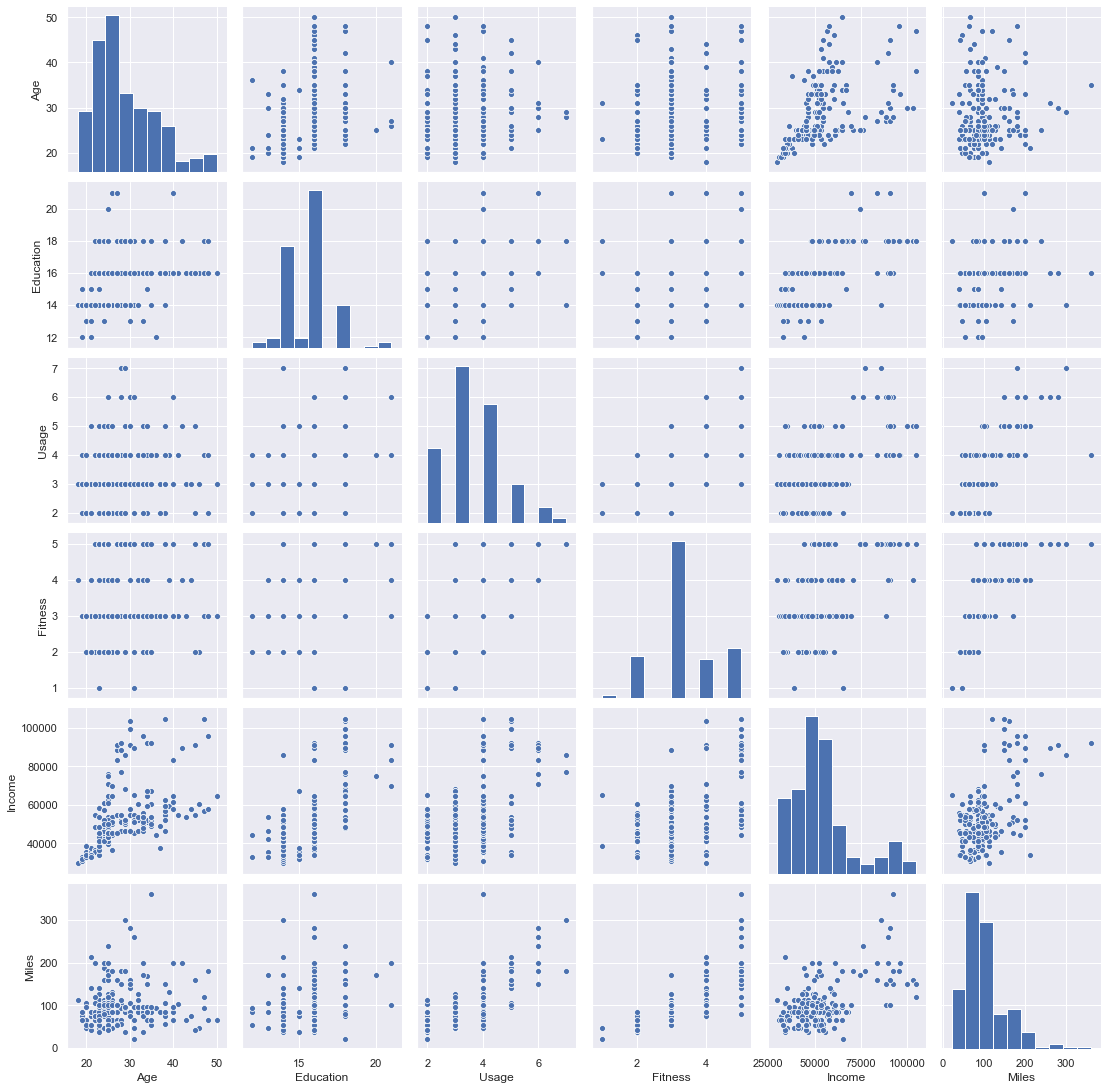

In [ ]:
import seaborn as sns

sns.pairplot(cardio)

# Violin plot below shows that TM798 is more targeted towards higher income range 
# where as TM195, TM498 are targeted towards affordable income range

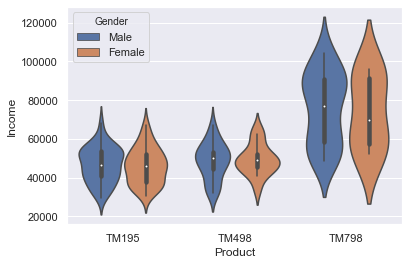

In [ ]:
sns.violinplot(cardio['Product'], cardio['Income'], hue=cardio['Gender'])


# A violin plot shows that the average # of miles being recorded on TM798 is nearly double compared to 
# that of TM195 &  TM498, but the interquartile range is higher, indicating there the tails are longer for TM798.



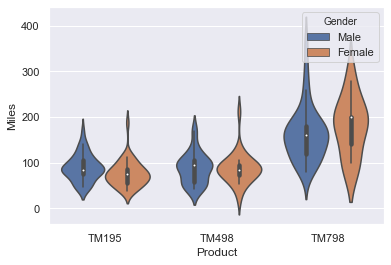

In [ ]:
sns.violinplot(cardio['Product'], cardio['Miles'], hue=cardio['Gender'])



# The fitness levels are higher in those using TM798 compared to those using other products.  Observed in both Single and partnered folks


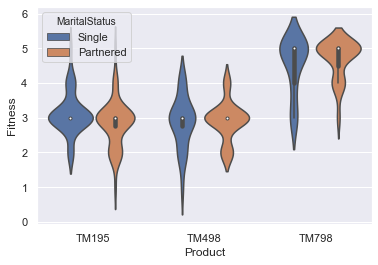

In [ ]:
sns.violinplot(cardio['Product'], cardio['Fitness'], hue=cardio['MaritalStatus'])



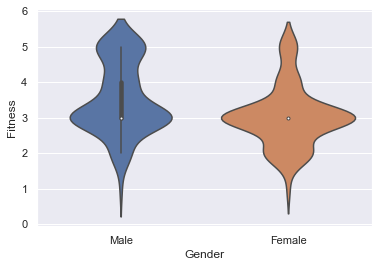

In [ ]:
sns.violinplot(cardio['Gender'], cardio['Fitness'])

# The upper tail distribution in Males is a bit concentrated at higher fitness levels compared to that of Females. 
# In Females, most of the distribution is around average fitness level

# Data shows Education levels for TM798 are higher compared to other 2 products.

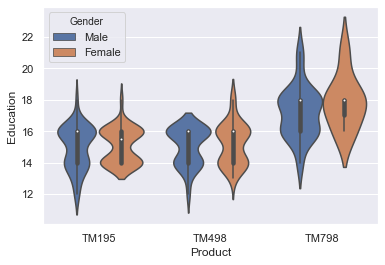

In [ ]:
sns.violinplot(cardio['Product'], cardio['Education'], hue=cardio['Gender'])



# The Mean age of TM498 is slightly higher than that of the other two products.

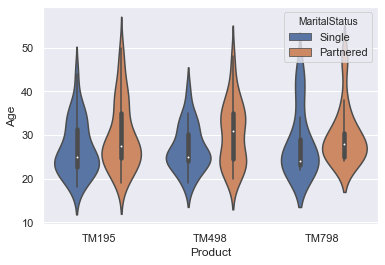

In [ ]:
sns.violinplot(cardio['Product'],cardio['Age'], hue=cardio['MaritalStatus'])


In [ ]:
cardio.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


# Observations from correlation matrix:
# Data shows that the highest correlation is between Fitness and miles, indicating the higher the fitness the more # of miles 
# the next highest correlation is between Miles and Usage, indicating the higher usage, the higher the number of miles
# A significant correlation is also shown between Education and Income.
# Similarly a higher correlation is found between Fitness and usage.

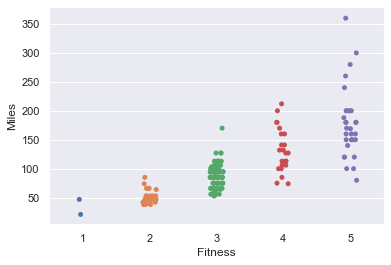

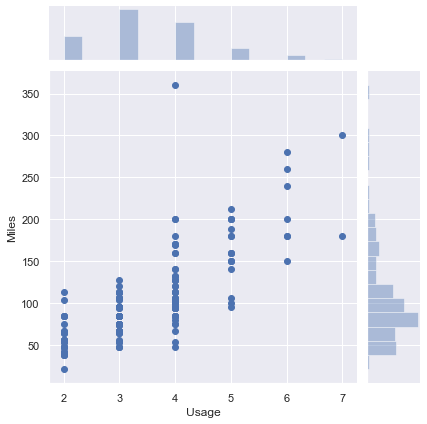

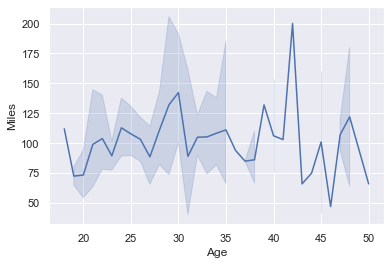

In [ ]:
sns.stripplot(cardio['Fitness'], cardio['Miles'], jitter=True)
plt.show()   # Fitness level 5 has higher disperson.

sns.jointplot(cardio['Usage'], cardio['Miles'])
plt.show()

sns.lineplot(cardio['Age'], cardio['Miles'])

In [ ]:
# 
cardio.groupby(['Product','Gender']).count()

Age  Education  MaritalStatus  Usage  Fitness  Income  Miles
Product Gender                                                              
TM195   Female   40         40             40     40       40      40     40
        Male     40         40             40     40       40      40     40
TM498   Female   29         29             29     29       29      29     29
        Male     31         31             31     31       31      31     31
TM798   Female    7          7              7      7        7       7      7
        Male     33         33             33     33       33      33     33

In [ ]:
cardio.groupby(['Product','Gender']).mean()

Age  Education     Usage   Fitness        Income  \
Product Gender                                                           
TM195   Female  28.450000  15.100000  2.900000  2.875000  46020.075000   
        Male    28.650000  14.975000  3.275000  3.050000  46815.975000   
TM498   Female  29.103448  15.206897  3.137931  2.862069  49336.448276   
        Male    28.709677  15.032258  3.000000  2.935484  48634.258065   
TM798   Female  27.000000  17.857143  5.000000  4.571429  73633.857143   
        Male    29.545455  17.212121  4.727273  4.636364  75825.030303   

                     Miles  
Product Gender              
TM195   Female   76.200000  
        Male     89.375000  
TM498   Female   87.344828  
        Male     88.483871  
TM798   Female  180.000000  
        Male    164.121212

# Conclusion :
# TM798 is a product appear to be catered to specific audience who are interested in higher fitness levels ,
# while the other two products are catered to general audience.
# TM498 doesnt offer any significant benefits compared to TM195, and its the second best seller.
# Women seem to be benefitting more from the TM798 product going by the usage and # of miles, yet the # of Female 
# users for TM798 is very low.


# Recommendations :  
# i) Market TM798 in lower income range to improve sales, and potentially tap into the TM498 Market, by lowering price.
# ii) Hence target marketing towards Female users for T798 product